* `Import Libraries`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

* `Read the Dataset`

In [2]:
df = pd.read_csv('music_dataset_mod.csv')
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [7]:
df.dtypes

Tempo                          float64
Dynamics Range                 float64
Vocal Presence                 float64
Percussion Strength            float64
String Instrument Detection    float64
Electronic Element Presence    float64
Rhythm Complexity              float64
Drums Influence                float64
Distorted Guitar               float64
Metal Frequencies              float64
Ambient Sound Influence        float64
Instrumental Overlaps          float64
Genre                           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [9]:
df.describe()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


* `EDA`

In [10]:
df.isna().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [11]:
df['Genre'].value_counts()

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

In [12]:
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

* `Data Visualization & Handling Outliers`

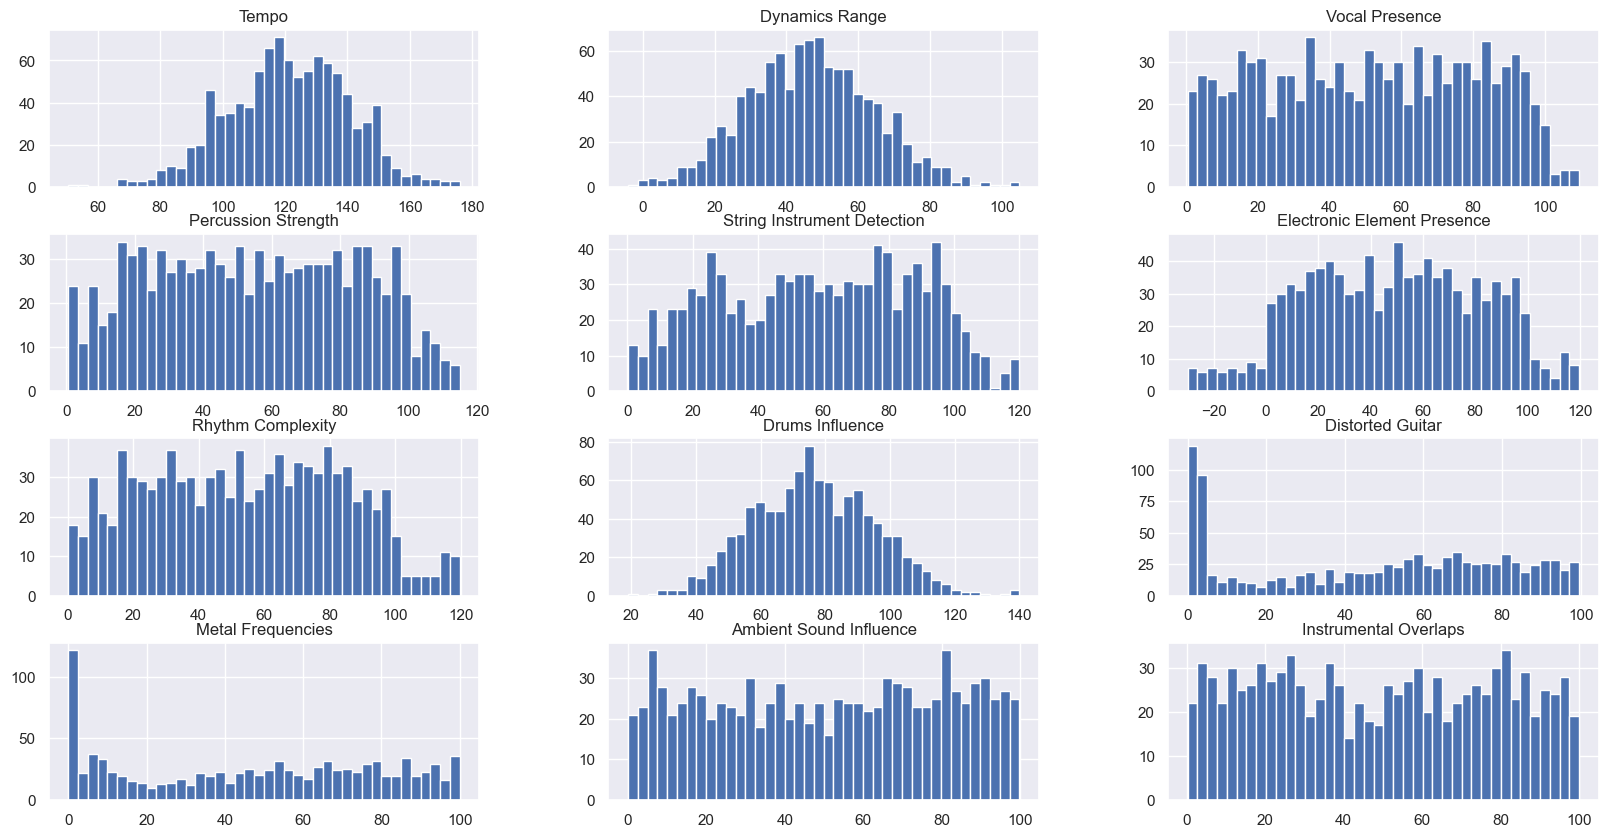

In [13]:
df.hist(bins=40, figsize=(20, 10))
plt.show()

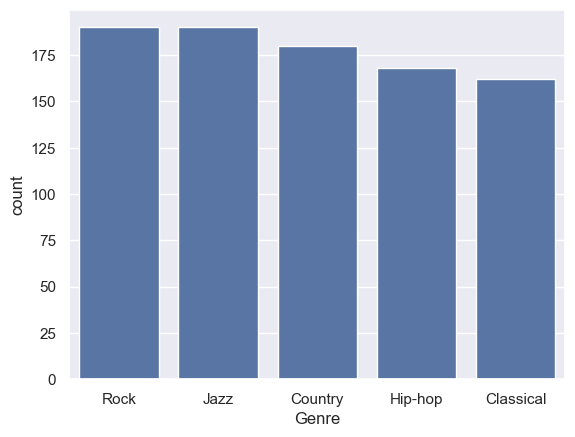

In [16]:
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index.tolist())
plt.show()

<Axes: ylabel='Genre'>

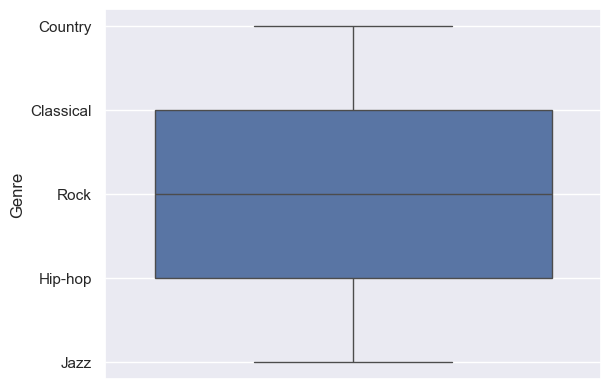

In [17]:
sns.boxplot(data=df, y='Genre')

* `Data Preprocessing`

In [18]:
new_df = df
new_df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [19]:
df_cleaned = new_df.dropna()
df_cleaned

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [21]:
X = df_cleaned.drop('Genre', axis=1)
Y = df_cleaned['Genre']

In [22]:
X.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986


In [23]:
Y.head()

0      Country
1    Classical
2         Rock
3      Hip-hop
4      Country
Name: Genre, dtype: object

* `Label Encoding`

In [24]:
le = LabelEncoder()

In [43]:
encoded_Y = le.fit_transform(Y)
encoded_Y

array([1, 0, 4, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 4, 2, 4, 3, 0, 4, 2, 1, 0,
       1, 3, 3, 4, 3, 4, 2, 1, 4, 1, 4, 0, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1,
       2, 1, 4, 1, 4, 0, 1, 1, 0, 3, 2, 4, 4, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       4, 2, 2, 3, 0, 2, 1, 3, 2, 2, 0, 2, 3, 1, 0, 4, 3, 2, 0, 2, 3, 1,
       1, 0, 4, 1, 3, 2, 3, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 4, 2, 0, 0, 1,
       3, 4, 3, 2, 3, 1, 0, 2, 1, 0, 2, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 4, 3, 2, 1, 3, 1, 4, 1, 0, 1, 2, 2, 2, 1, 1, 2, 3, 4,
       1, 2, 2, 4, 4, 2, 0, 3, 4, 4, 1, 4, 1, 2, 3, 0, 3, 4, 4, 4, 3, 0,
       4, 0, 4, 3, 3, 2, 3, 4, 0, 1, 1, 4, 3, 2, 1, 1, 3, 2, 4, 1, 0, 2,
       1, 4, 0, 2, 2, 4, 0, 2, 3, 0, 0, 2, 4, 2, 3, 3, 4, 2, 3, 1, 1, 0,
       3, 2, 4, 3, 2, 3, 1, 4, 3, 3, 0, 3, 4, 3, 0, 4, 4, 3, 1, 1, 4, 0,
       3, 2, 3, 3, 1, 0, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 0, 4, 4, 1, 3, 2,
       3, 4, 1, 3, 4, 3, 1, 0, 4, 3, 0, 2, 2, 0, 4, 2, 4, 2, 1, 1, 0, 3,
       2, 4, 2, 1, 3, 4, 1, 2, 0, 4, 2, 4, 3, 3, 4,

In [44]:
df_cleaned['Genre'] = encoded_Y
df_cleaned.head()

C:\temp\ipykernel_16740\983323321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = encoded_Y


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


<Axes: >

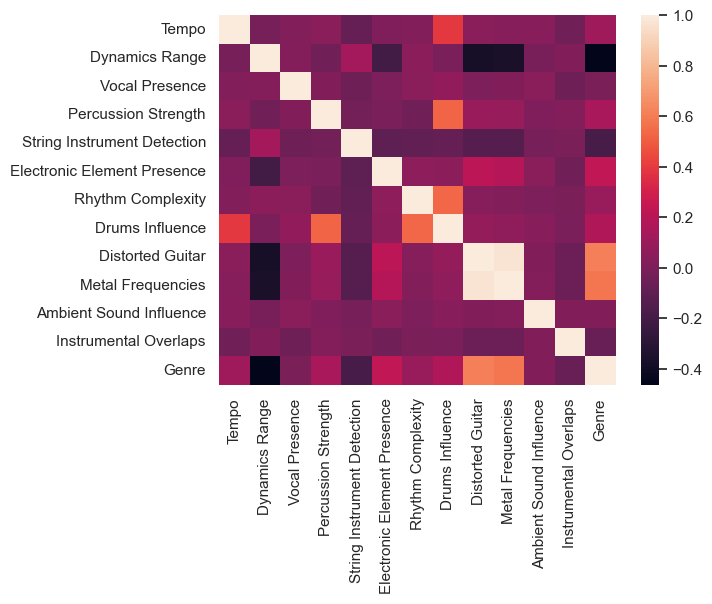

In [28]:
corr = df_cleaned.select_dtypes('number').corr()
sns.heatmap(corr)

In [71]:
# Extract the specific correlation coefficient
correlation = corr.loc['Metal Frequencies', 'Distorted Guitar']
print(f"Correlation between 'Metal Frequencies' and 'Distorted Guitar': {correlation}")

Correlation between 'Metal Frequencies' and 'Distorted Guitar': 0.9659088405873414


---

* `PCA`

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32276419,  0.63236264,  0.05320844, ...,  0.76493507,
         1.53633887,  0.16037718],
       [-0.21834523,  1.26791613,  1.52189513, ..., -1.4654764 ,
        -1.15313543, -1.16143819],
       [ 0.37404526,  0.35132812,  0.48306804, ...,  1.26039216,
         1.49165303, -0.81044425],
       ...,
       [ 0.03876913,  0.26524849, -0.61672579, ...,  1.51998929,
        -1.55523377,  0.8709389 ],
       [-1.2146319 , -1.52681996,  0.37815922, ...,  0.24787354,
        -1.00171631, -0.83061884],
       [-2.53711957, -0.76059346,  0.38551088, ..., -0.07983057,
         1.23101564,  0.9959692 ]])

In [33]:
pca = PCA()

In [34]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  0.74994362,
        -0.41133069, -0.20089952],
       [ 1.86454175,  2.72389526, -0.06110915, ..., -0.46808373,
        -0.06524083, -0.03262838],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  1.12924615,
        -0.20497339,  0.13108671],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ...,  0.61746001,
         0.86535466,  0.11015801],
       [-0.59721268, -2.33887467, -0.91433944, ..., -0.92203511,
        -0.11584256, -0.27384145],
       [ 0.33474784, -0.75956161,  0.16804437, ..., -0.96472679,
        -0.77845888,  0.16213001]])

* `Explained Variance by Components`

In [35]:
explained_vairiance_ratio = pca.explained_variance_ratio_
explained_vairiance_ratio

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

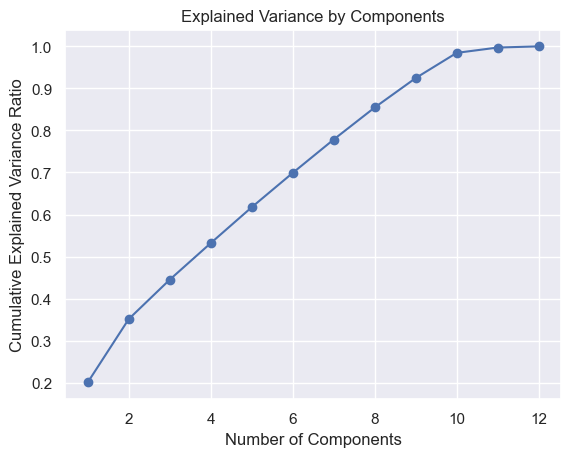

In [36]:
cumulative_variance_ratio = np.cumsum(explained_vairiance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) +1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Components')
plt.show()

In [67]:
n_component = np.argmax(cumulative_variance_ratio >= 0.8) + 1
n_component

8

In [39]:
pca_final = PCA(n_components=n_component)
X_reduced = pca_final.fit_transform(X_scaled)
X_reduced

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  1.05439349,
         0.24994853, -0.27158679],
       [ 1.86454175,  2.72389526, -0.06110915, ...,  1.34651169,
         1.06142384,  0.17034065],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  0.29362059,
         0.66875032,  0.49138804],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ..., -0.10027041,
         0.47496282, -1.95550656],
       [-0.59721268, -2.33887467, -0.91433944, ...,  0.13583326,
         0.02134544,  0.88701971],
       [ 0.33474784, -0.75956161,  0.16804437, ...,  2.28079533,
        -1.54104915,  1.21769653]])

* `Split the Dataset to train and test`

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, encoded_Y, test_size=0.3, random_state=42)

* `Logistic Regression`

In [46]:
lr_pca = LogisticRegression(max_iter=10000)
lr_pca.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [48]:
y_pred_pca = lr_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)

print('PCA Model Accuracy: ', accuracy_pca)
print('\nPCA Model Classification Report: ')
print(report_pca)

PCA Model Accuracy:  0.5355805243445693

PCA Model Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [49]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
   X_scaled, encoded_Y, test_size=0.3, random_state=42
)

In [50]:
lr_orig = LogisticRegression(max_iter=10000)
lr_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [51]:
y_pred_orig = lr_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
report_orig = classification_report(y_test_orig, y_pred_orig)

print("\nOriginal Data Model Accuracy: ", accuracy_orig)
print("\nOriginal Data Model Classification Report: ")
print(report_orig)


Original Data Model Accuracy:  0.5280898876404494

Original Data Model Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



* `Predict the missing values of target Genre`

In [59]:
label_encoder = le.fit_transform(new_df['Genre'])

In [52]:
unknown_df = new_df[new_df['Genre'].isna()]

In [53]:
X_unknown = unknown_df.drop('Genre', axis=1)
X_unknown_scaled = scaler.transform(X_unknown)

In [54]:
X_unknown_pca = pca_final.transform(X_unknown_scaled)

In [55]:
y_unknown_pred = lr_pca.predict(X_unknown_pca)

In [64]:
unknown_genre_labels = le.inverse_transform(y_unknown_pred)

In [65]:
new_df.loc[unknown_df.index, 'Genre'] = unknown_genre_labels

In [66]:
print(new_df.loc[unknown_df.index])

          Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
13   104.389822       65.826509       45.855410            55.655533   
18   101.367152       47.843370       93.230347            67.101777   
22    85.130539       55.707108       81.149615            21.473425   
31   121.100952       71.769727       49.609529            82.539647   
42    93.546825       44.563761       56.587554            99.546134   
..          ...             ...             ...                  ...   
991  130.719110       65.990957       21.775950            91.817048   
992  117.892313       35.001524       76.506358            77.972570   
993  104.315096       26.173723        3.334345            42.132602   
994  121.863373       50.872678       70.100162           106.212013   
995   66.578839       54.533872       99.782246            95.633310   

     String Instrument Detection  Electronic Element Presence  \
13                     76.058845                    55.625315   
18   

In [70]:
new_df['Genre'][992]

'Rock'

In [73]:
decoded_label = le.inverse_transform([2])  # Replace 2 with your encoded number
print(f"The original label for encoded value 2 is: {decoded_label[0]}")

The original label for encoded value 2 is: Hip-hop
